<a href="https://colab.research.google.com/github/pushna99/cs480student/blob/main/01/CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

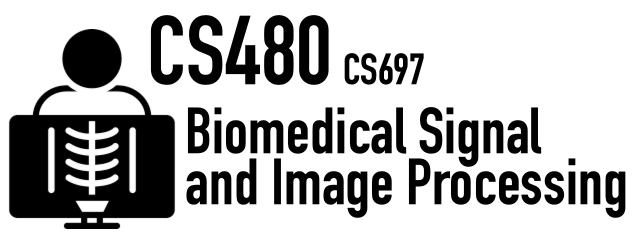
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [200]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [201]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [202]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

**Task 1:** Download, extract, and load the data! [15 Points]

In [203]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [204]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [205]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [206]:
# TODO: Please display this image and print the dimensions!

In [207]:
# TODO: YOUR CODE
from PIL import Image

(2090, 1858)


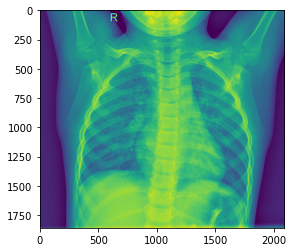

In [208]:
imshow(img)
image=Image.open(NORMAL_DIR + 'IM-0115-0001.jpeg')
print(image.size)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [209]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR)

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [210]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [211]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) Data arrangement into a list/array by resizing
#                    to a fixed value(to remove different sizes)
# TODO: Operation 2) Changing the size of image in the file itself 
#                    rather than storing the resized image in a variable

In [212]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [213]:
# TODO: YOUR CODE
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

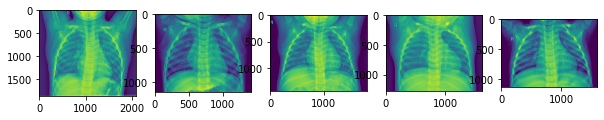

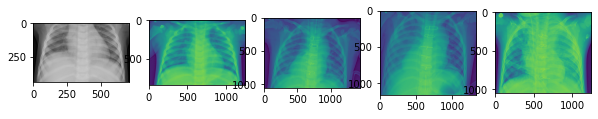

In [214]:
fig = plt.figure(figsize=(10, 10))
rows=1
columns=5
nimg1 = mpimg.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')
nimg2 = mpimg.imread(NORMAL_DIR + 'IM-0117-0001.jpeg')
nimg3 = mpimg.imread(NORMAL_DIR + 'IM-0119-0001.jpeg')
nimg4 = mpimg.imread(NORMAL_DIR + 'IM-0122-0001.jpeg')
nimg5 = mpimg.imread(NORMAL_DIR + 'IM-0125-0001.jpeg')
plt.subplot(rows,columns,1)
plt.imshow(nimg1)
plt.subplot(rows,columns,2)
plt.imshow(nimg2)
plt.subplot(rows,columns,3)
plt.imshow(nimg3)
plt.subplot(rows,columns,4)
plt.imshow(nimg4)
plt.subplot(rows,columns,5)
plt.imshow(nimg5)

fig = plt.figure(figsize=(10, 10))
rows = 1
columns = 5
pimg1 = mpimg.imread(PNEUMONIA_DIR + 'person1_bacteria_1.jpeg')
pimg2 = mpimg.imread(PNEUMONIA_DIR + 'person1_bacteria_2.jpeg')
pimg3 = mpimg.imread(PNEUMONIA_DIR + 'person2_bacteria_3.jpeg')
pimg4 = mpimg.imread(PNEUMONIA_DIR + 'person2_bacteria_4.jpeg')
pimg5 = mpimg.imread(PNEUMONIA_DIR + 'person3_bacteria_10.jpeg')
plt.subplot(rows,columns,1)
plt.imshow(pimg1)
plt.subplot(rows,columns,2)
plt.imshow(pimg2)
plt.subplot(rows,columns,3)
plt.imshow(pimg3)
plt.subplot(rows,columns,4)
plt.imshow(pimg4)
plt.subplot(rows,columns,5)
plt.imshow(pimg5)


**Task 3:** Setup training and testing data. [15 Points]

In [215]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [216]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [217]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target=[0]*60
training_target.extend([1]*60)
print(training_target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [218]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [219]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = [0]*40
testing_target.extend([1]*40)
print(testing_target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [220]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [221]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target)

In [222]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [223]:
# TODO: Random Forest builds many decision trees and merges 
#       them together to get more accurate and stable result.
#       It builds all its decision trees with an identifying prediction vote, 
#       so that the prediction which is repeated/voted more number 
#       times becomes the prediction for the whole dataset.

In [224]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9125

In [151]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [225]:
# TODO: The accuracy is 91.25% for this data. I am a bit suprised as to with such general data, there can be 100% accuracy.

**Bonus:** Let's take a closer look! [33 Points]

In [226]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

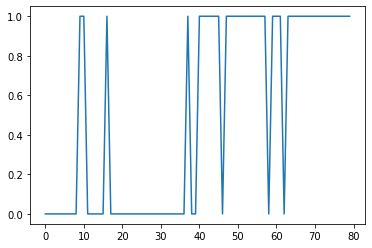

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [227]:
# TODO: 
predictions = clf.predict(testing_data)
plt.plot(predictions)
plt.show()
predictions

In [228]:
# Here, as we have our 80 sample data, out of which 40 of 
# them are normal xrays and the other 40 are pneumonic.
# In the first 40 samples, almost 5 images are been misclassified as pneumonic 
# and in the rest 40, 3 images are being termed as normal instead of pneumonic

In [229]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [230]:
# TODO: Any classification performance can be improved to achieve 100% accuracy 
# by generating more data to sample and test and by training and testing the 
# data in multiple algorithms that cross validates the previous data.

In [231]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw